In [1]:
import numpy as np
import random 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.set_printoptions(suppress=True)
np.random.seed(1)
%matplotlib inline

In [2]:
#extract dataframes corresponding to countries
def countryDF(country):
    countryData = df[df['Country'] == country]
    return countryData

#extract columns
def columnExtractor(dataframe, columnName):
    values = dataframe[columnName]
    return values 

def plotPopulation(qty1, qty2, label):
    #plt.yscale('log')
    plt.ylabel('Population')
    plt.xlabel('Years')
    plt.scatter(qty1, qty2, label=label)
    plt.title('Population vs Year')
    plt.legend()
    
# def plotLifeExpectancy(qty1, qty2, label):
#     plt.ylabel('Life Expectancy')
#     plt.xlabel('Years')
#     plt.scatter(qty1, qty2, label=label)
#     plt.title('Life Expectancy vs Year')
#     plt.legend()
    

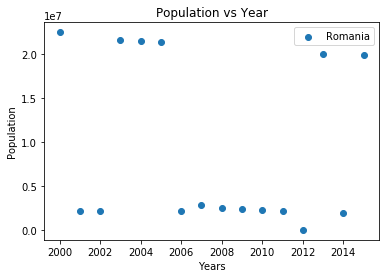

In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Population growth of 3 countries (Germany, Netherlands, Spain)
country = 'Romania'
countryDF = countryDF(country)
countryPopulation = columnExtractor(countryDF,'Population')
#countryLifeExpectancy = columnExtractor(countryDF, 'Life expectancy ')

years = columnExtractor(countryDF,'Year')
plotPopulation(years, countryPopulation,label=country)
#plotLifeExpectancy(years, countryLifeExpectancy,label=country)


# y = countryPopulation 
# y1 = countryPopulationTrain
# Y = countryPopulationTest
# y_pred = countryPopulationPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

countryPopulation = countryPopulation.tolist()
years = years.tolist()

combinedZip = list(zip(years,countryPopulation))
random.shuffle(combinedZip) 

years,countryPopulation = zip(*combinedZip) 

countryPopulation = list(countryPopulation)
countryPopulationTrain = countryPopulation[:12]

years = list(years)
yearsTrain = years[:12]


countryPopulationTest = countryPopulation[12:]
yearsTest = years[12:]

countryPopulation = countryPopulationTrain 
years = yearsTrain

countryPopulation = np.asarray(countryPopulation).reshape(-1,1)
years = np.asarray(years).reshape(-1,1)

countryPopulationTest = np.asarray(countryPopulationTest).reshape(-1,1)
yearsTest = np.asarray(yearsTest).reshape(-1,1)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(0, 10, 1000)).T
yearsPredict = np.array(np.linspace(2000, 2015, 10)).reshape(-1,1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(years, countryPopulation)

# Make the prediction on the meshed x-axis (ask for MSE as well)
countryPopulationPredict, sigma = gp.predict(yearsPredict, return_std=True)

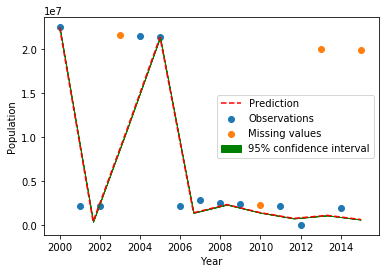

In [4]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()

#plt.plot(x, Y, 'r--',label=r'$f(x) = x\,\sin(x)$')
#actual data 
plt.scatter(years, countryPopulation,label='Observations')

#estimate
plt.plot(yearsPredict, countryPopulationPredict, 'r--', label='Prediction')
plt.scatter(yearsTest,countryPopulationTest,label='Missing values')

#plt.fill(np.concatenate([x, x[::-1]]),
#         np.concatenate([y_pred - 1.9600 * sigma,
#                        (y_pred + 1.9600 * sigma)[::-1]])[:,6],
#         alpha=1, fc='b', ec='None', label='95% confidence interval')


plt.fill_between(yearsPredict.flat, (countryPopulationPredict.flat-2*sigma), (countryPopulationPredict.flat+2*sigma), 
                 color='green',alpha=1,label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylabel('Population')
plt.xlabel('Year')

plt.legend()